# K-MEANS
1) Küme sayısı belirlenir.
2) Rastgele k merkez seçilir.
3) Her gözlem için k merkezlere uzaklıklar hesaplanır.
4) Her gözlem en yakın olduğu merkeze yani kümeye atanır.
5) Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.
6) Bu işlem belirlenen iterasyon adedinde tekrar edilir v eküme içi hata karaler toplamlarının toplamının minimum olduğu durumdaki gözlemlerin kümeleme yapısı nihai kümelenme olarak seçilir.

In [2]:
#!pip install yellowbrick

In [75]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
sc = StandardScaler()
df = sc.fit_transform(df)

In [6]:
kmeans = KMeans(n_clusters=4).fit(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [8]:
kmeans.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [9]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [10]:
kmeans.inertia_

57.55425863091105

Optimum küme sayısını belirleme

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

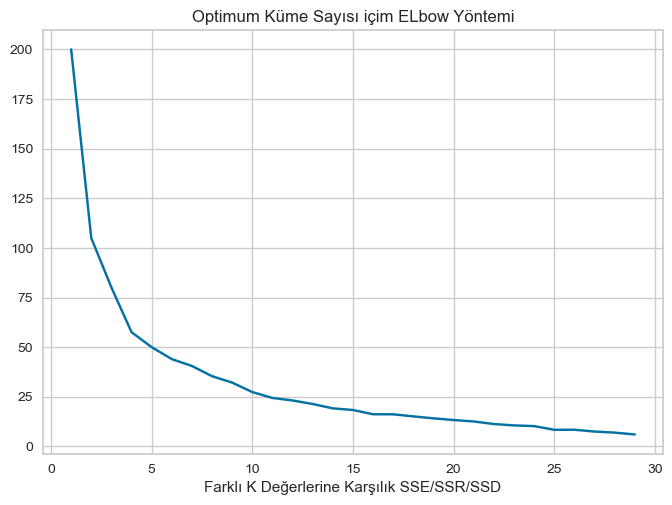

In [11]:
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme Sayısı içim ELbow Yöntemi")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

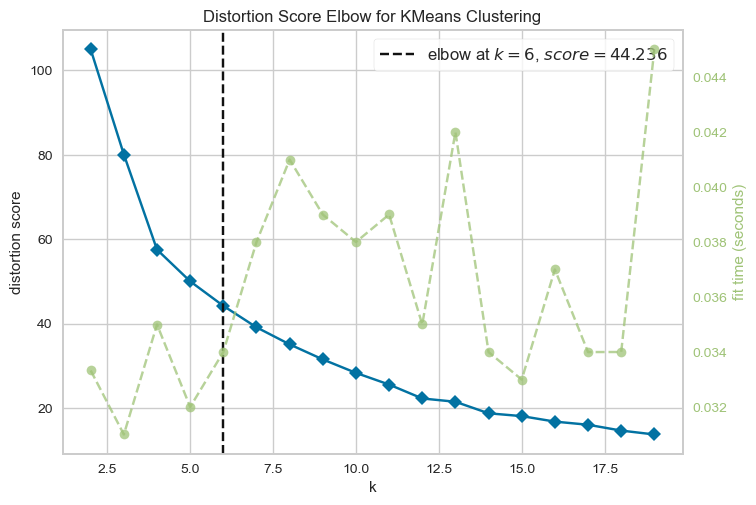

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [13]:
elbow.elbow_value_

6

In [14]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
kmeans_cluster = kmeans.labels_

df = pd.read_csv("datasets/USArrests.csv", index_col=0)

df["kmeans_cluster"] = kmeans_cluster

df.head()

,Murder,Assault,UrbanPop,Rape,kmeans_cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,5


In [17]:
df.groupby("kmeans_cluster").agg(['count', 'mean', 'median'])

Murder                   Assault                    UrbanPop  \
                count       mean median   count        mean median    count   
kmeans_cluster                                                                
0                  10   5.050000   4.85      10  136.700000  132.5       10   
1                   7  11.485714  11.30       7  274.000000  285.0        7   
2                  10   2.680000   2.40      10   70.100000   64.5       10   
3                  11   7.072727   6.80      11  140.272727  151.0       11   
4                   7  14.671429  14.40       7  251.285714  249.0        7   
5                   5  10.240000  10.00       5  250.000000  255.0        5   

                                  Rape                    
                     mean median count       mean median  
kmeans_cluster                                            
0               79.300000   78.5    10  17.590000  17.55  
1               78.000000   80.0     7  28.342857  27.80  
2               51.000000   52.5    10  10.910000  11.00  
3               61.454545   63.0    11  20.136364  19.50  
4               54.285714   58.0     7  21.685714  22.20  
5               74.400000   78.0     5  40.980000  40.60

# Hierarchical Cluster Analysis

Agglomerative(Birleştirici)

Divisive(Bölümleyici)

In [18]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

In [19]:
sc = StandardScaler()
df = sc.fit_transform(df)

In [20]:
hc_average = linkage(df, "average") #Agglomerative

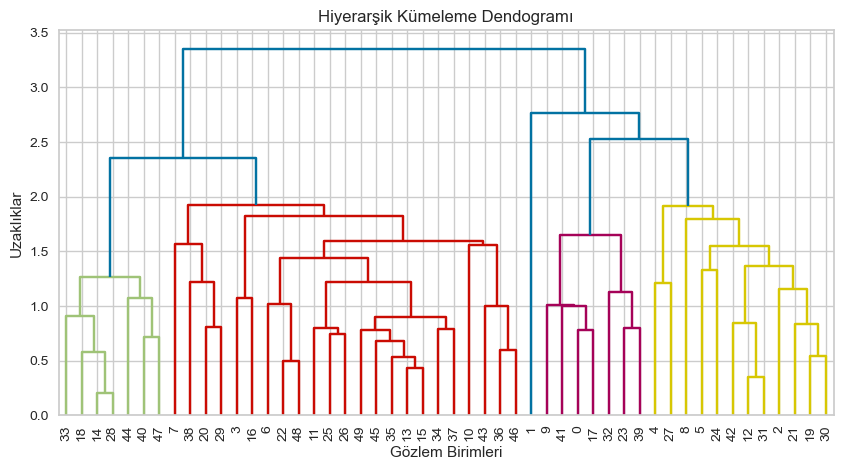

In [21]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average, leaf_font_size=10)
plt.show()

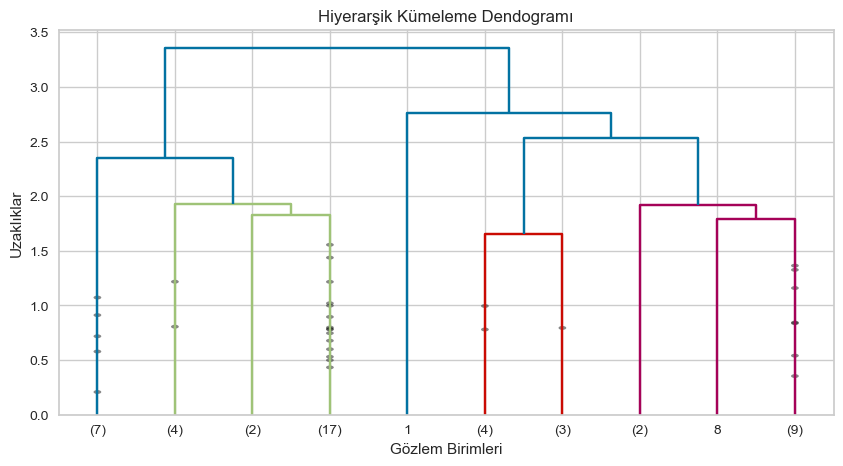

In [23]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10,
           )
plt.show()

Küme Sayısı Belirleme

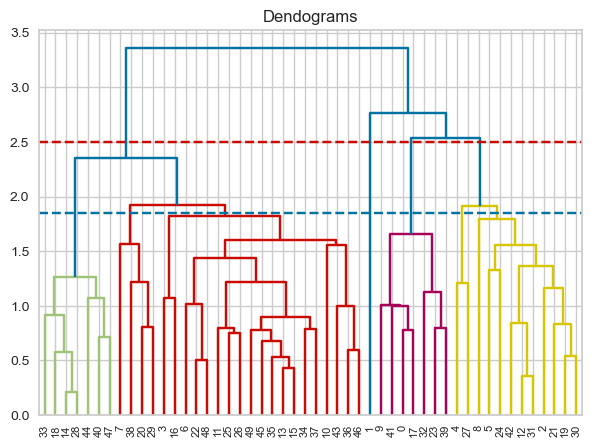

In [24]:
plt.figure(figsize=(7, 5))
plt.title("Dendograms")
dend=dendrogram(hc_average)
plt.axhline(y=2.5, color='r', linestyle='--')
plt.axhline(y=1.85, color='b', linestyle='--')
plt.show()

Final Model

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

In [27]:
hi_clusters = cluster.fit_predict(df)

In [29]:
df["hi_cluster"] = hi_clusters

In [30]:
df.head()

,Murder,Assault,UrbanPop,Rape,kmeans_cluster,hi_cluster
Alabama,13.2,236,58,21.2,4,3
Alaska,10.0,263,48,44.5,5,2
Arizona,8.1,294,80,31.0,1,1
Arkansas,8.8,190,50,19.5,3,0
California,9.0,276,91,40.6,5,1


# Principal Component Analysis

Çok değişkenli verinin ana özelliklerini daha az sayıda değişken ile temsil etmektir. Diğer ifade ile küçük bir miktarda bilgi kaybını göze alıp değişken boyutunu azaltmaktır.

In [31]:
df = pd.read_csv("datasets/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [33]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and col not in "Salary"]

In [34]:
df = df[num_cols]
df.dropna(inplace=True)
df.shape

(322, 16)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [36]:
sc = StandardScaler()
df = sc.fit_transform(df)

In [37]:
pca = PCA()
pca_fit = pca.fit_transform(df)

In [38]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [39]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

In [40]:
#Optimum bileşen sayısı

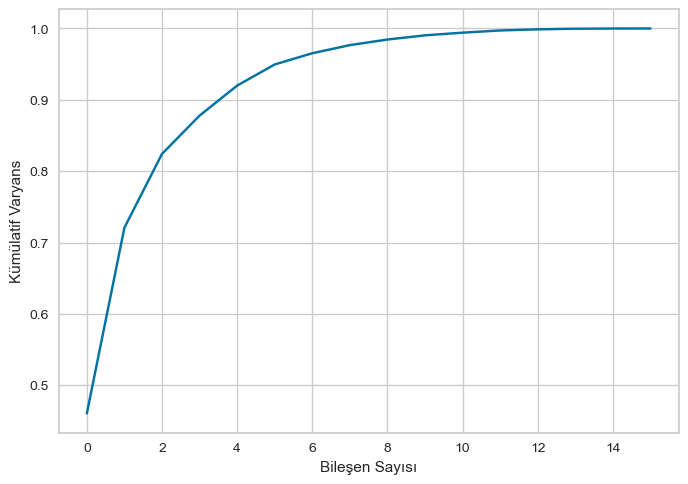

In [42]:
pca=PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans")
plt.show()

Regresyonda çoklu doğrusal bağlantı problemini gidermek için değişken sayısı kadar bileşen oluşturmayı deneyebiliriz. Böylece veri setindeki bilginin tamamı korunmuş olur ama değişkenler birbirinden bağımsız olur. Yüksek korelasyon problemine ve çoklu doğrusal bağlantı problemine sahip olmaz.

####Final PCA#####


In [44]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [45]:
pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [46]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

# Principal Component Regression (Temel Bileşen Regresyon Modeli)

In [47]:
df = pd.read_csv("datasets/Hitters.csv")

In [48]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and col not in "Salary"]

In [49]:
others = [col for col in df.columns if col not in num_cols]

In [50]:
pd.DataFrame(pca_fit, columns=["PCA1", "PCA2", "PCA3"]).head()

,PCA1,PCA2,PCA3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [51]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [52]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PCA1", "PCA2", "PCA3"]), df[others]], axis=1)

In [53]:
final_df.head()

,PCA1,PCA2,PCA3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [57]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ["League", "Division", "NewLeague"]:
    label_encoder(final_df, col)

In [58]:
final_df

,PCA1,PCA2,PCA3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,0,0,NaN,0
1,0.245488,1.302951,0.118040,1,1,475.0,1
2,0.603883,-2.617002,-0.698183,0,1,480.0,0
3,3.591276,0.547821,-1.049022,1,0,500.0,1
4,-2.264528,-0.698898,-1.290536,1,0,91.5,1
...,...,...,...,...,...,...,...
317,-0.089503,-0.521050,-0.770721,1,0,700.0,1
318,3.339811,-0.732713,3.114194,0,0,875.0,0
319,-0.951442,-0.910086,0.286517,0,1,385.0,0
320,2.091473,-2.265826,-0.192745,0,0,960.0,0


In [59]:
final_df.dropna(inplace=True)

In [60]:
final_df

,PCA1,PCA2,PCA3,League,Division,Salary,NewLeague
1,0.245488,1.302951,0.118040,1,1,475.0,1
2,0.603883,-2.617002,-0.698183,0,1,480.0,0
3,3.591276,0.547821,-1.049022,1,0,500.0,1
4,-2.264528,-0.698898,-1.290536,1,0,91.5,1
5,1.229535,-1.825093,3.659220,0,1,750.0,0
...,...,...,...,...,...,...,...
317,-0.089503,-0.521050,-0.770721,1,0,700.0,1
318,3.339811,-0.732713,3.114194,0,0,875.0,0
319,-0.951442,-0.910086,0.286517,0,1,385.0,0
320,2.091473,-2.265826,-0.192745,0,0,960.0,0


In [61]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [64]:
lm = LinearRegression()
print(np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error"))))
print(y.mean())

345.6021106351967
535.9258821292775


In [65]:
cart = DecisionTreeRegressor()
print(np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error"))))

392.8755610543359


In [67]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

print(np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error"))))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
330.1964109339104


In [68]:
#### Mülakat Sorusu
"""
Elimizde label yok ama sınıflandırma yapmak istiyoruz nasıl yaparız?
Unsupervised ile kümelere ayırıp labellar oluştur, sonra suvervised model kur ve
tahmin yap
"""

'\nElimizde label yok ama sınıflandırma yapmak istiyoruz nasıl yaparız?\nUnsupervised ile kümelere ayırıp labellar oluştur, sonra suvervised model kur ve\ntahmin yap\n'

In [70]:
#PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme

In [71]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [72]:
df = pd.read_csv("datasets/breast_cancer.csv")

y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

In [73]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)

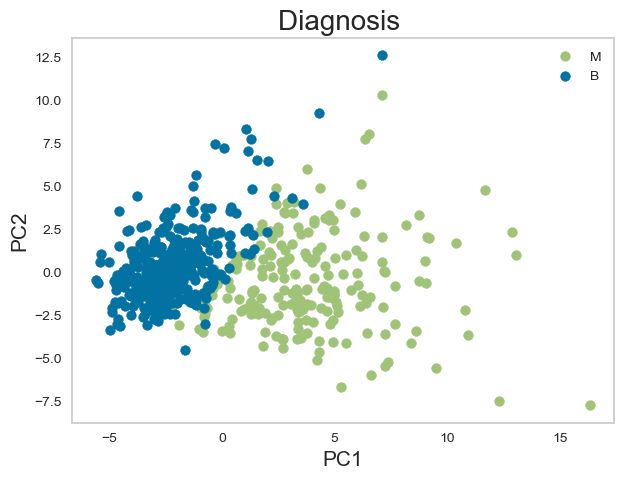

In [77]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")

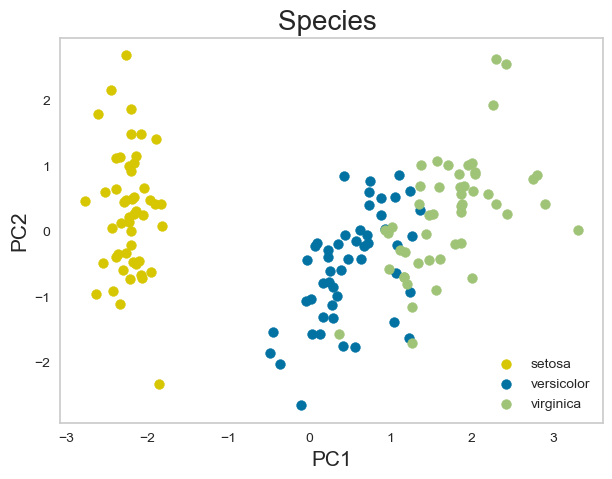

In [78]:
import seaborn as sns
df = sns.load_dataset("iris")

y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "species")

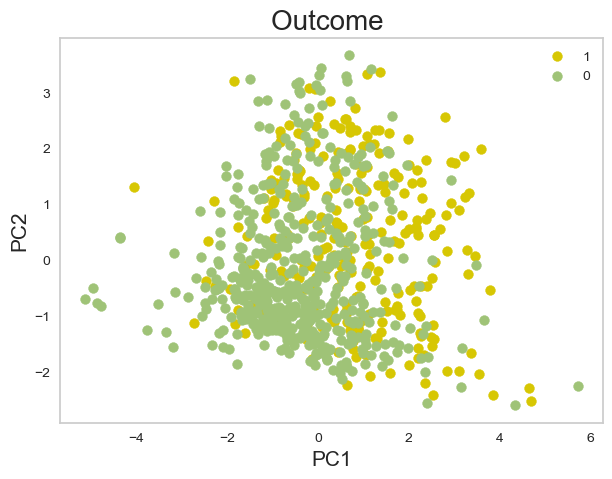

In [80]:
df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")